# Training a perceptron via scikit-learn

In [4]:
from sklearn import datasets
import numpy as np
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:,[2,3]]
Y = iris_dataset.target
Y.shape

(150,)

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

/home/jeovach/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


standar scalar
Using the preceding code, we loaded the StandardScaler class from the
preprocessing module and initialized a new StandardScaler object that we assigned
to the variable sc . Using the fit method, StandardScaler estimated the parameters
μ (sample mean) and σ (standard deviation) for each feature dimension from the
training data. By calling the transform method, we then standardized the training
data using those estimated parameters μ and σ . Note that we used the same
scaling parameters to standardize the test set so that both the values in the training
and test dataset are comparable to each other.

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

now train a perceptron model

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.0001, random_state=0)
ppn.fit(X_train, Y_train)
Y_pred = ppn.predict(X_test)
print("miss error:", (Y_test!=Y_pred).sum() )


miss error: 4


In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier,
                         test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='_',
                    s=55, label='test set')

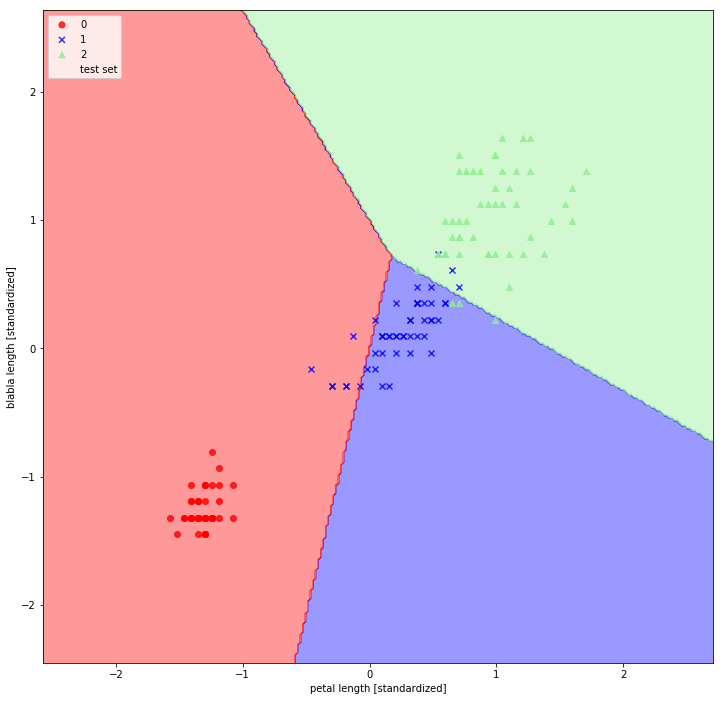

In [6]:
X_all = np.vstack((X_train, X_test))
Y_all = np.hstack((Y_train, Y_test))
width = 12
height = 12
plt.figure(figsize=(width, height))
plot_decision_regions(X_all, Y_all,
                     classifier=ppn,test_idx=[range(105,150)])
plt.xlabel('petal length [standardized]')
plt.ylabel('blabla length [standardized]')
plt.legend(loc="upper left")

# Training a logistic regression model with scikit-learn

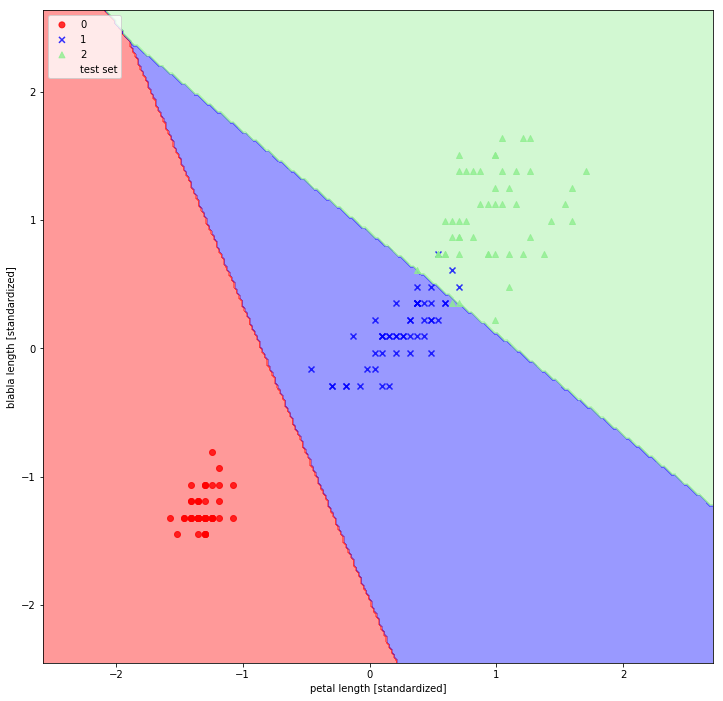

In [7]:
from sklearn.linear_model import LogisticRegression
width = 12
height = 12
plt.figure(figsize=(width, height))
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, Y_train)
plot_decision_regions(X_all, Y_all,
                     classifier=lr, test_idx=[range(105,150)])
plt.xlabel('petal length [standardized]')
plt.ylabel('blabla length [standardized]')
plt.legend(loc="upper left")

# Tackling overfitting via regularization

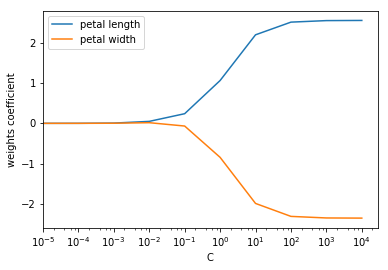

In [12]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train, Y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
        label='petal length')
plt.plot(params, weights[:, 1],
        label="petal width")
plt.ylabel("weights coefficient")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()

# Maximum margin classification with support vector machines

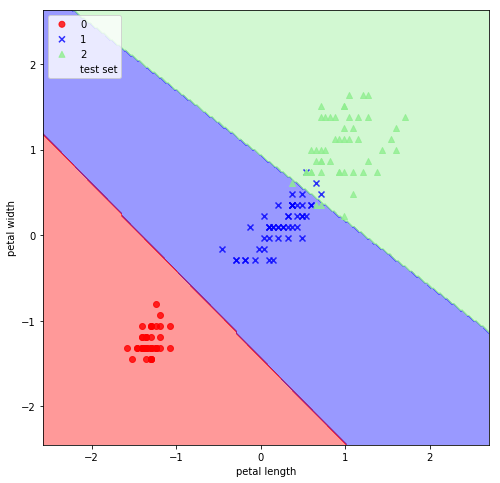

In [19]:
from sklearn.svm import SVC
plt.figure(figsize=(8,8))
svm = SVC(kernel="linear", C=1.0, random_state=0)
svm.fit(X_train, Y_train)
plot_decision_regions(X_all, Y_all, 
                     classifier=svm, test_idx=[range(105,150)])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()

In [20]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# Solving nonlinear problems using a kernel SVM

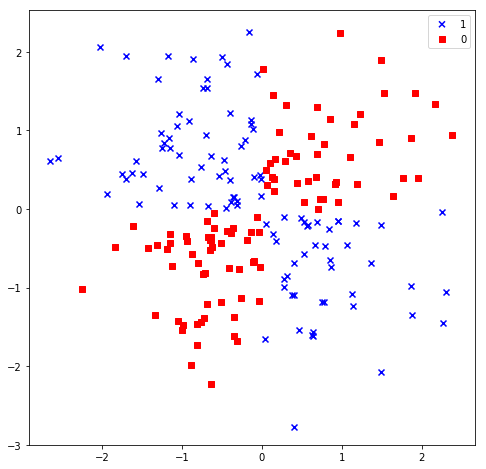

In [36]:
#logic XOR
np.random.seed(0)
X_xor = np.random.randn(200,2)
Y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:, 1] > 0)
Y_xor = np.where(Y_xor, 1, -1)
plt.figure(figsize=(8,8))
plt.scatter(X_xor[Y_xor==1, 0], X_xor[Y_xor==1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[Y_xor==-1, 0], X_xor[Y_xor==-1, 1],
           c='r', marker='s', label='0')
plt.ylim(-3.0)
plt.legend()
plt.show()

# Using the kernel trick to find separating hyperplanes in higher dimensional space

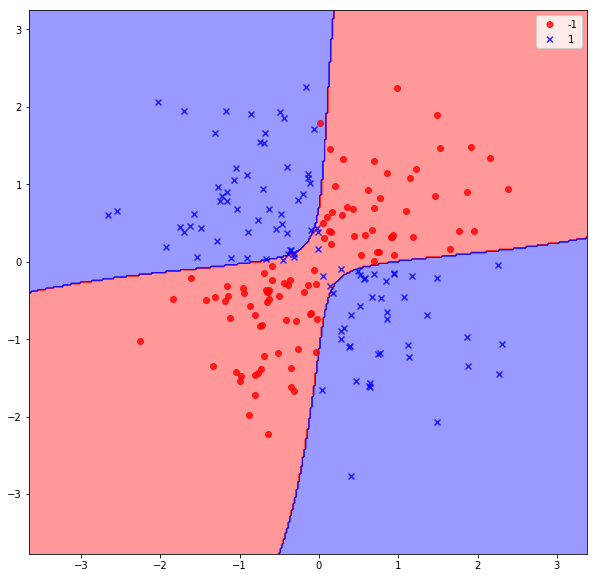

In [51]:
svm = SVC(kernel="rbf", random_state=0, gamma=0.1, C=10.0) #Radial Basis Function kernel
svm.fit(X_xor, Y_xor)
plt.figure(figsize=(10,10))
plot_decision_regions(X_xor, Y_xor, classifier=svm)
plt.legend()
plt.show()

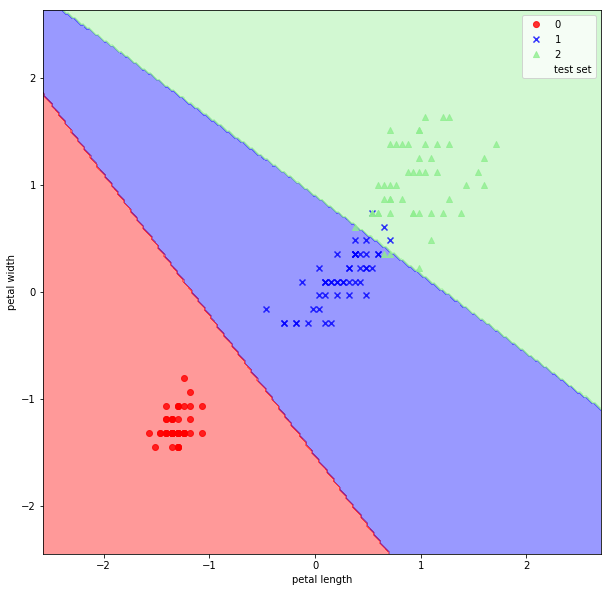

In [54]:
svm = SVC(kernel="rbf", random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train, Y_train)
plt.figure(figsize=(10,10))
plot_decision_regions(X_all, Y_all, classifier=svm,
                    test_idx=[range(105,150)])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

# Decision tree learning

/home/jeovach/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log2
/home/jeovach/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


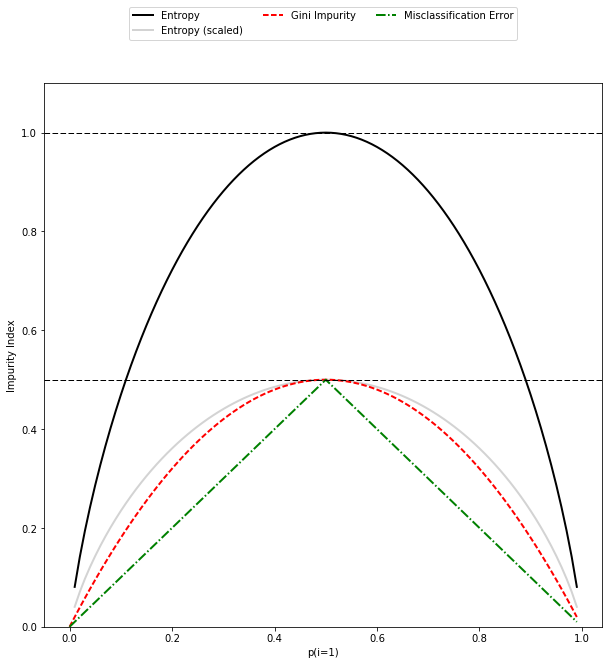

In [59]:
# IG:
def gini(p):
    return (p) * (1 - (p)) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
# show plt
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) for p in x]
plt.figure(figsize=(10, 10))
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(p) for p in x]
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                        ["Entropy", "Entropy (scaled)",
                        "Gini Impurity",
                        "Misclassification Error"],
                         ["-", "-", "--", "-."],
                         ["black", "lightgray",
                             "red", "green", "cyan"]):
    line = ax.plot(x, i, label=lab,
                  linestyle=ls, lw=2, color=c)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color="k", linestyle="--")
ax.axhline(y=1, linewidth=1, color="k", linestyle="--")
plt.ylim([0, 1.1])
plt.xlabel("p(i=1)")
plt.ylabel("Impurity Index")
plt.show()

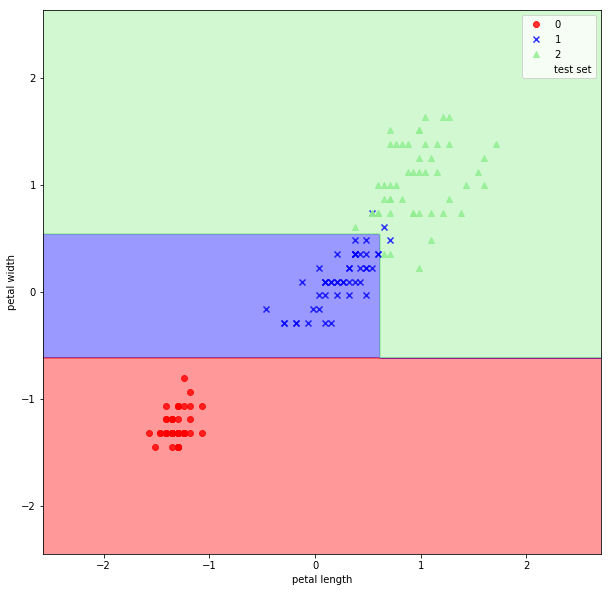

In [70]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",
                             max_depth=3, random_state=0)
tree.fit(X_train, Y_train)
plt.figure(figsize=(10,10))
plot_decision_regions(X_all, Y_all, 
                     classifier=tree, test_idx=[range(105, 150)])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

In [66]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",
                feature_names=["petal length", "petal width"])

# Combining weak to strong learners via random forests

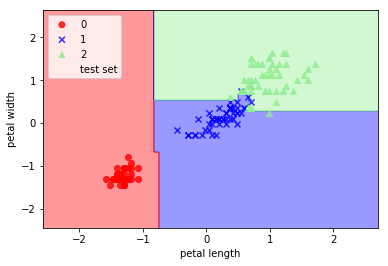

In [73]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="entropy",
                               n_estimators=10,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train, Y_train)
plot_decision_regions(X_all, Y_all, 
                     classifier=forest, test_idx=[range(105,150)])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()